<a href="https://colab.research.google.com/github/snehahampapura/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

#**Importing the necessary libraries and reading the file**

In [42]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
from numpy import math
from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [43]:
#Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
#Importing Dataset

# dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML/datasets/SeoulBikeData.csv",encoding='latin1')

#Path for Sneha

dataset = pd.read_csv("/content/drive/MyDrive/Data/SeoulBikeData.csv",encoding='latin1')

#**Data Exploration**

In [45]:
#First look of data
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [46]:
dataset.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [47]:
#Taking a look at statistics of the columns
dataset.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [48]:
#Familiarise with the columns in the dataset and their data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [49]:
# Finding Any Null Value Present in the data set
dataset.isnull().values.any()

False

There are No Null values / missing values.

In [50]:
# checking for duplicate
len(dataset[dataset.duplicated()])

0

There are no duplicated values aswell.

In [51]:
dataset.shape

(8760, 14)

This Dataset contains 8760 rows and 14 columns. Since we don't have any missing/ duplicate values will be retaining all the rows as of now.

In [52]:
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

#**Data Preprocessing**

Splitting up of "Date" column

In [53]:
#Column Date 
#Splitting up "Date" column into "year","month","day" columns
dataset['Date'] = dataset['Date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))

In [54]:
# creating different columns for month, day and year
dataset['month'] = dataset['Date'].dt.month
dataset['day'] = dataset['Date'].dt.day_name()
dataset['year'] = dataset['Date'].dt.year

In [55]:
dataset['weekday']=dataset['day'].apply(lambda x : 0 if x=='Saturday' or x=='Sunday' else 1 )

We have splitted up "Date" column into day,month and year. So, "Date" column is no longer needed. Since we have created "weekday" column out of day. "day" column is no longer needed. Let's drop bothof these columns.

In [56]:
dataset=dataset.drop(columns=['Date','day'],axis=1)

This dataset contains data from 2017 dec to 2018 Nov. i.e, 1 year of data. So, we don't need year column. Let's drop it.

In [57]:
dataset.drop(columns=['year'],axis=1,inplace=True)

In [58]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  month                      8760 non-null   int64

"Hour","month","weekday" - datatype of these columns are shown has int, but actually these are categorical data. So, let's convert the datatype.

In [59]:
#Changing datatype
#Change the int64 column into category column
cols=['Hour','month','weekday']
for col in cols:
  dataset[col]=dataset[col].astype('category')

In [60]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Bike Count          8760 non-null   int64   
 1   Hour                       8760 non-null   category
 2   Temperature(°C)            8760 non-null   float64 
 3   Humidity(%)                8760 non-null   int64   
 4   Wind speed (m/s)           8760 non-null   float64 
 5   Visibility (10m)           8760 non-null   int64   
 6   Dew point temperature(°C)  8760 non-null   float64 
 7   Solar Radiation (MJ/m2)    8760 non-null   float64 
 8   Rainfall(mm)               8760 non-null   float64 
 9   Snowfall (cm)              8760 non-null   float64 
 10  Seasons                    8760 non-null   object  
 11  Holiday                    8760 non-null   object  
 12  Functioning Day            8760 non-null   object  
 13  month                      8760 n

In [61]:
dataset.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1


#**Exploratory Data Analysis**

##Analysis of Dependent variable.

First will look into our dependent variable i.e, Rented Bike count.


Rented Bike count gives us the information of number of bikes rented per hour

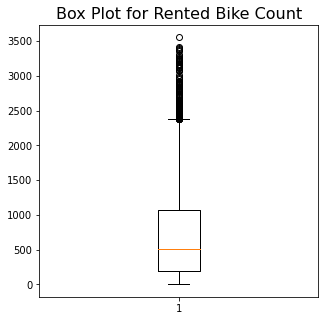

In [62]:
plt.figure(figsize=(5,5))
plt.title("Box Plot for Rented Bike Count",fontsize=16)
plt.boxplot(dataset['Rented Bike Count'])
plt.show()

In [63]:
#Considering the value above 3500 as an outlier, lets drop it.
dataset.drop(dataset[dataset['Rented Bike Count']>3500].index,axis=0,inplace=True)

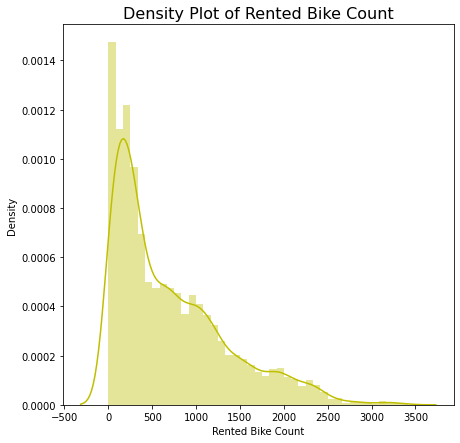

In [64]:
plt.figure(figsize=(7,7))
plt.title("Density Plot of Rented Bike Count",fontsize=16)
sns.distplot(dataset['Rented Bike Count'],color="y")
plt.show()

Through density plot we got know that it is right skewed, so to remove skewness we will be applying square root.

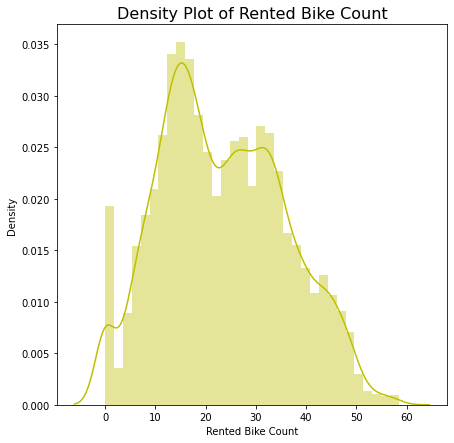

In [65]:

plt.figure(figsize=(7,7))
plt.title("Density Plot of Rented Bike Count",fontsize=16)
sns.distplot(np.sqrt(dataset['Rented Bike Count']),color="y")
plt.show()

##Analysis of Independent variables.

###Analysis of Numerical variables

In [66]:
dataset.describe().columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

####**Temperature**

Temperature is measured in celsius. And it gives the temperature at that particular hour.

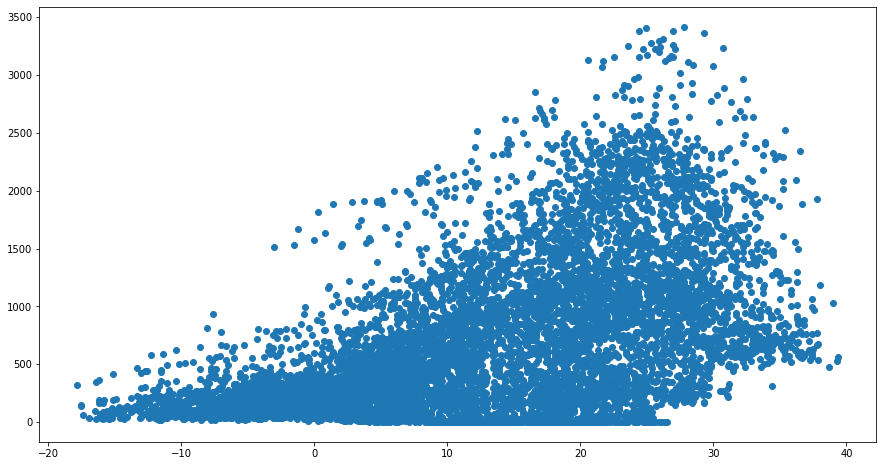

In [67]:
plt.figure(figsize=(15,8))
plt.scatter(dataset['Temperature(°C)'],dataset['Rented Bike Count'])
plt.show()

We can see there is a positive correlation between rented bike count and temperature.

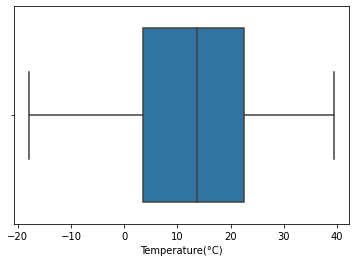

In [68]:
sns.boxplot(dataset['Temperature(°C)'])

There are no outliers.

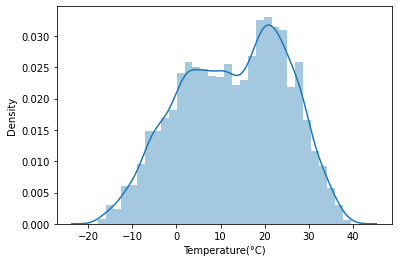

In [69]:
sns.distplot(dataset['Temperature(°C)'])

And the distribution is also almost normal.

In [70]:
dataset['Temp'] = dataset['Temperature(°C)'].apply(np.floor)

In [71]:
dataset.groupby('Temp')['Rented Bike Count'].mean().head()

Temp
-18.0    169.250000
-17.0    151.111111
-16.0     84.129032
-15.0     98.631579
-14.0    150.555556
Name: Rented Bike Count, dtype: float64

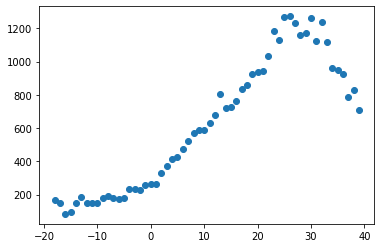

In [72]:
temperature_bikecount=pd.DataFrame(dict(dataset.groupby('Temp')['Rented Bike Count'].mean()),index=['Average Bike Count']).transpose().reset_index()
temperature_bikecount.rename(columns={'index':'Temperature'},inplace=True)
plt.scatter(temperature_bikecount['Temperature'],temperature_bikecount['Average Bike Count'])
plt.show()

We can even observe that people like to ride bikes mostly during warm temperature. i.e, around 25 degree celsius.

####**Humidity**

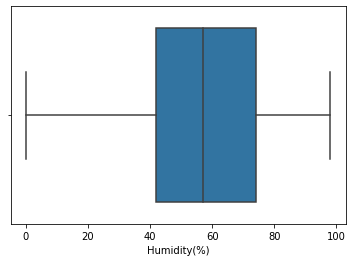

In [73]:
sns.boxplot(dataset['Humidity(%)'])
plt.show()

There are no outliers.

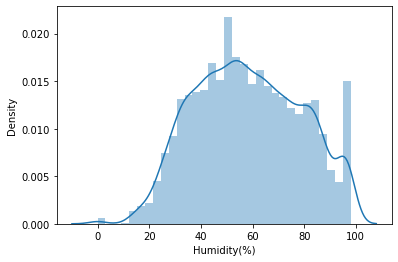

In [74]:
sns.distplot(dataset['Humidity(%)'])
plt.show()

The distribution is also almost normal.

In [75]:
humidity_bikecount=pd.DataFrame(dict(dataset.groupby('Humidity(%)')['Rented Bike Count'].mean()),index=['Average Bike Count']).transpose().reset_index()

In [76]:
humidity_bikecount.rename(columns={'index':'Humidity'},inplace=True)

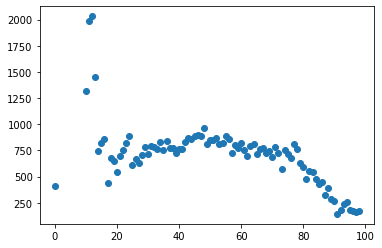

In [77]:
plt.scatter(humidity_bikecount['Humidity'],humidity_bikecount['Average Bike Count'])
plt.show()

We can observe that as the humidity rises above 70%, there is a steep decrease in the bike demand.

####**Wind Speed**

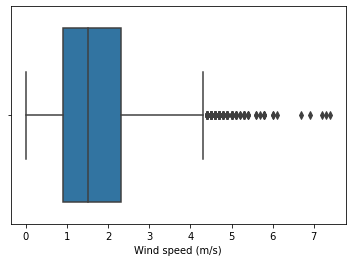

In [78]:
sns.boxplot(dataset['Wind speed (m/s)'])
plt.show()

In [79]:
#Considering the value above 6 as an outlier, lets drop it.
dataset.drop(dataset[dataset['Wind speed (m/s)']>6].index,axis=0,inplace=True)

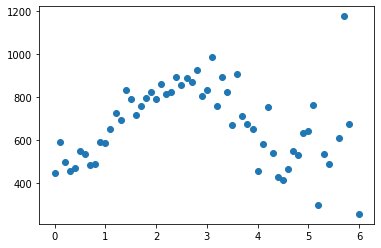

In [80]:
temperature_bikecount=pd.DataFrame(dict(dataset.groupby('Wind speed (m/s)')['Rented Bike Count'].mean()),index=['Average Bike Count']).transpose().reset_index()
temperature_bikecount.rename(columns={'index':'Wind speed (m/s)'},inplace=True)
plt.scatter(temperature_bikecount['Wind speed (m/s)'],temperature_bikecount['Average Bike Count'])
plt.show()

We can see there is a sinusoidal relation between Rented Bike Count and Wind speed.

####**Visibility**

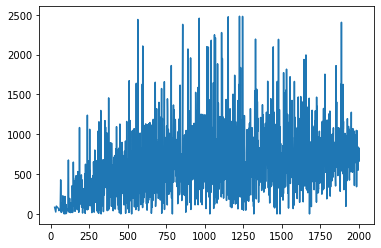

In [81]:
temperature_bikecount=pd.DataFrame(dict(dataset.groupby('Visibility (10m)')['Rented Bike Count'].mean()),index=['Average Bike Count']).transpose().reset_index()
temperature_bikecount.rename(columns={'index':'Visibility (10m)'},inplace=True)
plt.plot(temperature_bikecount['Visibility (10m)'],temperature_bikecount['Average Bike Count'])
plt.show()

We cannot observe any prominent relation between Visibility and the dependent variable Rented Bike Count

So, lets Drop this feature.

In [82]:
cols_to_drop = ['Visibility (10m)']